In [188]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

import matplotlib.pyplot as plt
import seaborn as sns

In [190]:
df_path = 'spotifyeda.csv'

In [192]:
df = pd.read_csv('spotifyeda.csv')

In [194]:
df.head()

,playlist_url,year,track_id,track_name,track_popularity,album_name,artist_id,artist_name,artist_genres,artist_popularity,...,duration_ms,time_signature,genre_category,track_index,track_genre,explicit,artist_pop_bin,is_hiphop,duration_sec,hiphop_label
0,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,all the small things,83,enema of the state,6FBDaR13swtiWwGhX1WQsP,blink-182,"['alternative metal', 'modern rock', 'pop punk...",79,...,167067,4,rock,85056,punk-rock,0,Mid-High,False,167.067,Other
1,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3y4LxiYMgDl4RethdzpmNe,breathe,66,breathe,25NQNriVT2YbSW80ILRWJa,faith hill,"['contemporary country', 'country', 'country d...",62,...,250547,4,country,19859,country,0,Low,False,250.547,Other
2,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,0v1XpBHnsbkCn7iJ9Ucr1l,it's my life,81,crush,58lV9VcRSjABbAbfWS6skp,bon jovi,"['glam metal', 'rock']",79,...,224493,4,rock,71055,metal,0,Mid-High,False,224.493,Other
3,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3yfqSUWxFvZELEM4PmlwIR,the real slim shady,87,the marshall mathers lp,7dGJo4pcD2V6oG8kP0tJRR,eminem,"['detroit hip hop', 'hip hop', 'rap']",90,...,284200,4,hip hop / rap,51216,hip-hop,1,High,True,284.200,Hip-Hop / Rap
4,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,60a0Rd6pjrkxjPbaKzXjfq,in the end,88,hybrid theory (bonus edition),6XyY86QOPPrYVGvF9ch6wz,linkin park,"['alternative metal', 'nu metal', 'post-grunge...",86,...,216880,4,rock,3006,alternative,0,High,False,216.880,Other


In [206]:
df.shape

(67, 30)

In [208]:
GENRE_CANDIDATES = {"genre_category", "track_genre", "genre"}
GENRE_COLS = [c for c in df.columns if c.lower() in GENRE_CANDIDATES]
if not GENRE_COLS:
    raise KeyError("No genre column found – cannot filter to Hip‑Hop tracks.")
GENRE_COL = GENRE_COLS[0]

In [214]:
mask_hiphop = df[GENRE_COL].str.contains("hip", case=False, na=False)
df = df[mask_hiphop].copy()
print(f"After hip‑hop filter : {df.shape}")

After hip‑hop filter : (34, 30)


In [216]:
if GENRE_COL in df.columns and df[GENRE_COL].nunique() == 1:
    df.drop(columns=GENRE_COL, inplace=True)

In [218]:
df.head()

,playlist_url,year,track_id,track_name,track_popularity,album_name,artist_id,artist_name,artist_genres,artist_popularity,...,valence,tempo,duration_ms,time_signature,track_index,explicit,artist_pop_bin,is_hiphop,duration_sec,hiphop_label
3,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3yfqSUWxFvZELEM4PmlwIR,the real slim shady,87,the marshall mathers lp,7dGJo4pcD2V6oG8kP0tJRR,eminem,"['detroit hip hop', 'hip hop', 'rap']",90,...,0.760,104.504,284200,4,51216,1,High,True,284.200,Hip-Hop / Rap
26,https://open.spotify.com/playlist/37i9dQZF1DX9...,2001,3UmaczJpikHgJFyBTAJVoz,stan,82,the marshall mathers lp,7dGJo4pcD2V6oG8kP0tJRR,eminem,"['detroit hip hop', 'hip hop', 'rap']",90,...,0.507,80.063,404107,4,51301,1,High,True,404.107,Hip-Hop / Rap
48,https://open.spotify.com/playlist/37i9dQZF1DX0...,2002,7lQ8MOhq6IN2w8EYcFNSUk,without me,88,the eminem show,7dGJo4pcD2V6oG8kP0tJRR,eminem,"['detroit hip hop', 'hip hop', 'rap']",90,...,0.662,112.238,290320,4,51159,1,High,True,290.320,Hip-Hop / Rap
50,https://open.spotify.com/playlist/37i9dQZF1DX0...,2002,4xkOaSrkexMciUUogZKVTS,till i collapse,84,the eminem show,7dGJo4pcD2V6oG8kP0tJRR,eminem,"['detroit hip hop', 'hip hop', 'rap']",90,...,0.100,171.447,297787,4,51277,1,High,True,297.787,Hip-Hop / Rap
205,https://open.spotify.com/playlist/37i9dQZF1DXc...,2010,15JINEqzVMv3SvJTAXAKED,love the way you lie,85,recovery,7dGJo4pcD2V6oG8kP0tJRR,eminem,"['detroit hip hop', 'hip hop', 'rap']",90,...,0.641,86.989,263373,4,51401,1,High,True,263.373,Hip-Hop / Rap


In [220]:
ID_COLS = ["track_id", "track_name"]  # high‑cardinality ids
TOO_SPARSE = []                        # add >95 % missing cols here

df.drop(columns=[c for c in ID_COLS + TOO_SPARSE if c in df.columns], inplace=True)
df.drop_duplicates(inplace=True)
print(f"After clean‑up : {df.shape}")


After clean‑up : (34, 27)


In [224]:
if "artist_popularity" not in df.columns:
    required = {"artist_name", "track_popularity"}
    missing  = required.difference(df.columns)
    if missing:
        raise KeyError(f"Missing columns required for artist_popularity: {missing}")

    artist_pop = (
        df.groupby("artist_name")["track_popularity"].mean()
          .rename("artist_popularity")
    )
    df = df.merge(artist_pop, on="artist_name", how="left")

print("\nAdded artist_popularity – preview:")
print(df[["artist_name", "track_popularity", "artist_popularity"]].head())


Added artist_popularity – preview:
    artist_name  track_popularity  artist_popularity
3        eminem                87                 90
26       eminem                82                 90
48       eminem                88                 90
50       eminem                84                 90
205      eminem                85                 90


In [234]:
TARGET = "track_popularity"   

y = df[TARGET]
X = df.drop(columns=TARGET)

cat_cols = X.select_dtypes(include="object").columns.tolist()
num_cols = X.select_dtypes(include="number").columns.tolist()

print("Categorical →", cat_cols)
print("Numeric     →", num_cols[:10], "… (total", len(num_cols), ")")


Categorical → ['playlist_url', 'album_name', 'artist_id', 'artist_name', 'artist_genres', 'artist_pop_bin', 'hiphop_label']
Numeric     → ['year', 'artist_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness'] … (total 18 )


In [228]:
numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols)
], remainder="drop")


In [236]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=None
)

print("Train shape :", X_train.shape)
print("Test  shape :", X_test.shape)


Train shape : (23, 26)
Test  shape : (11, 26)


In [240]:
preprocessor.fit(X_train)

X_train_arr = preprocessor.transform(X_train)
X_test_arr  = preprocessor.transform(X_test)

try:
    feature_names = preprocessor.get_feature_names_out()
except AttributeError:
    ohe_names = (
        preprocessor.named_transformers_["cat"]
                   .named_steps["ohe"].get_feature_names_out(cat_cols)
    )
    feature_names = np.r_[num_cols, ohe_names]

X_train_df = pd.DataFrame(X_train_arr, columns=feature_names, index=X_train.index)
X_test_df  = pd.DataFrame(X_test_arr,  columns=feature_names, index=X_test.index)

print("Prepared train shape :", X_train_df.shape)
print("Prepared test  shape :", X_test_df.shape)

Prepared train shape : (23, 73)
Prepared test  shape : (11, 73)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


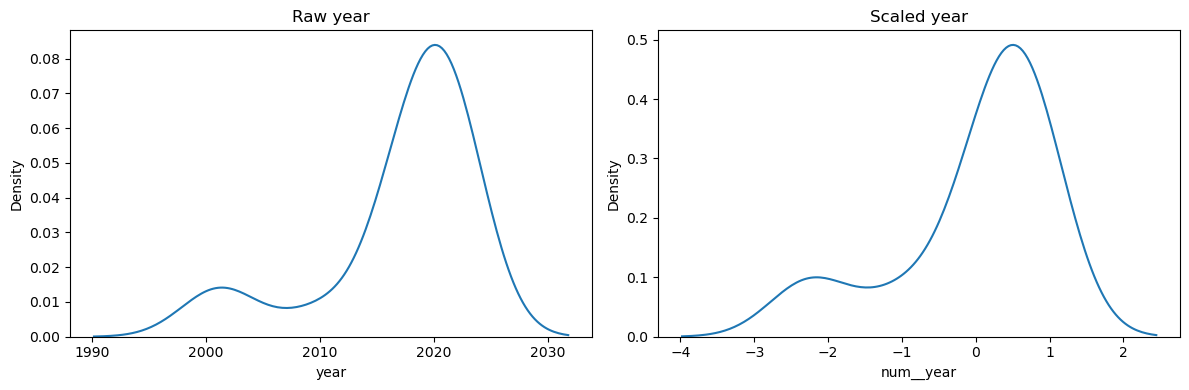

In [242]:
if num_cols:
    sel_feat = num_cols[0]
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.kdeplot(df[sel_feat], ax=ax[0])
    sns.kdeplot(X_train_df[f"num__{sel_feat}"] , ax=ax[1])
    ax[0].set_title(f"Raw {sel_feat}")
    ax[1].set_title(f"Scaled {sel_feat}")
    plt.tight_layout()


In [244]:
X_train_df.to_csv("spotify_X_train_prepared.csv", index=False)
X_test_df.to_csv("spotify_X_test_prepared.csv" , index=False)
y_train.to_csv("spotify_y_train.csv", index=False)
y_test.to_csv("spotify_y_test.csv"  , index=False)

joblib.dump(preprocessor, "spotify_preprocessor.joblib")

['spotify_preprocessor.joblib']